<h1 style="text-align: center;">Seminario 3:</h1>
<h1 style="text-align: center;">Diseño y desarrollo de fármacos I</h1>


### Objetivos

* Conozca a y aplique las principales estrategias de diseño y desarrollo racional de nuevos fármacos.
* Analice el impacto de las distintas modificaciones moleculares sobre las propiedades y/o la actividad biológica de los prototipos.

Comenzamos importando todos los módulos necesarios para poder ejecutar las funciones que necesitamos.

In [14]:
from functions_sem3 import *

## **Aplicación de estrategias**

### Ejercicio 1:

In [15]:
#Se definen los argumentos necesarios para la función molecules()

list =  "ibu.smi"
template = 'C'
suppl = load_Smiles_supplier(list)

Para visualizar las moléculas de este ejercicio utilizamos la función <strong style="background-color:DodgerBlue;">molecules()</strong> que requiere de dos argumentos. 

Argumentos: template y suppl.

ibuprofeno
CC(C)Cc1ccc(CC(=O)O)cc1


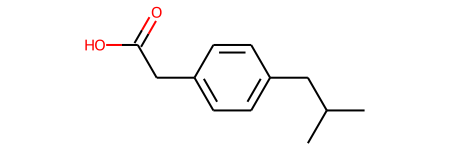

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Ibufenaco
CC(C)Cc1ccc(C(C)C(=O)O)cc1


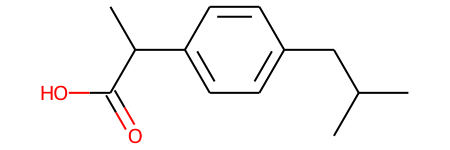

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [16]:
molecules(template, suppl)

Para visualizar si las moléculas poseen centros quirales <strong style="background-color:DodgerBlue;">quiral_centers()</strong>. El reconocimiento de centros quirales es de mucha relevancia farmacéutica debido a que el compuesto puede tener actividad estereoselectiva.

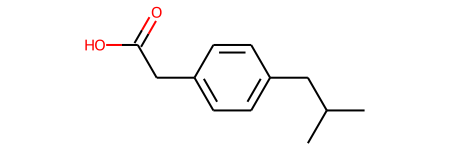

CC(C)Cc1ccc(CC(=O)O)cc1
[]
LogP= 2.5122
ibuprofeno


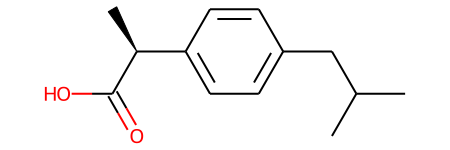

CC(C)Cc1ccc([C@H](C)C(=O)O)cc1
[(10, 'S')]
LogP= 3.073200000000001
Ibufenaco


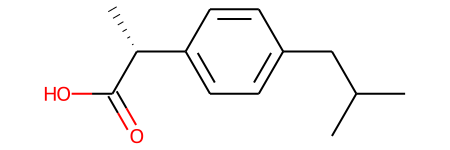

CC(C)Cc1ccc([C@@H](C)C(=O)O)cc1
[(10, 'R')]
LogP= 3.073200000000001
Ibufenaco


In [25]:
quiral_centers(suppl, template)

### Diseño: 

Tenemos dos listas de posibles reactivos para formar los profarmacos, a continuación podran observar cuales son: 

In [26]:
reactants = 'reactants.smi'
ibufenaco = 'CC(C)Cc1ccc(cc1)CC(=O)I'

octanol
CCCCCCCCO


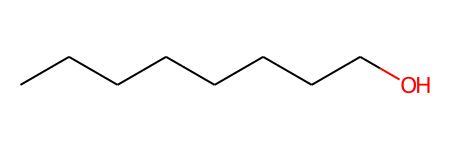

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

etanol
CCO


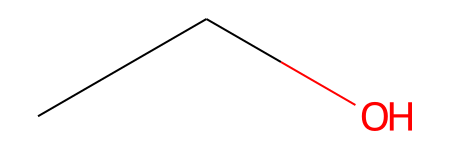

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

fenilpentanol
OCCCCCc1ccccc1


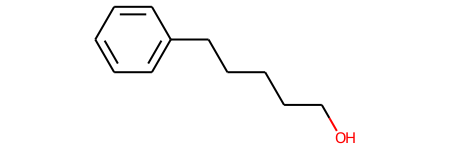

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [19]:
reactant_ibu = Chem.MolFromSmiles(ibufenaco)
reactants_mol = load_Smiles_supplier(reactants)
molecules(template,reactants_mol)

Utilizaremos esta reacción para obtener los profarmacos, utilizando los reactivos presentados recientemente:

In [20]:
#Estas reacciónes son realizadas con nomeclatura SMARTS
#Reacción para generar ésters
r1_reaction = AllChem.ReactionFromSmarts('[C:1]I.[O:2][C:3]>>[C:1][O:2][C:3]')
#Reacción para generar amidas
r2_reaction = AllChem.ReactionFromSmarts('[C:1]I.[N:2][C:3]>>[C:1][N:2][C:3]')


Con esta función pueden observar los productos obtenidos en la síntesis insilico de profármacos con ésteres y sus propiedades

In [21]:
for mol in reactants_mol:
    product =  r1_reaction.RunReactants((reactant_ibu, mol))
    product_smi = Chem.MolToSmiles(product[0][0])
    product_mol = Chem.MolFromSmiles(product_smi)
    viewer = MolTo3DView(product_mol, size=(400, 400), style="stick", surface=False, opacity=0.5)
    viewer.show()
    logP(product_mol)
    rotable_bonds(product_mol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

LogP= 5.331300000000006
Enlaces_rotables 11


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

LogP= 2.9907000000000012
Enlaces_rotables 5


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

LogP= 5.383800000000005
Enlaces_rotables 10


Con esta función pueden observar los productos obtenidos en la síntesis insilico de profármacos con amidas y sus propiedades

amine1
CCCCCN


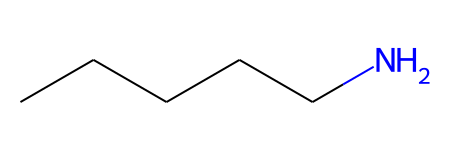

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

amine2
NCCCc1ccccc1


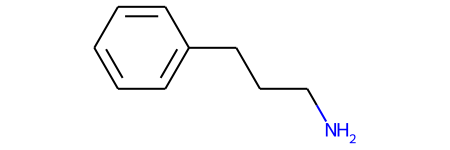

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

amine3
NCCC1CCc2ccccc2C1


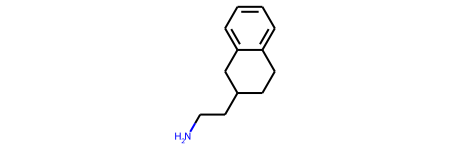

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [22]:
amines = 'amines.smi'
reactants_mol = load_Smiles_supplier(amines)
molecules(template,reactants_mol)

In [23]:
for mol in reactants_mol:
    product =  r2_reaction.RunReactants((reactant_ibu, mol))
    product_smi = Chem.MolToSmiles(product[0][0])
    product_mol = Chem.MolFromSmiles(product_smi)
    viewer = MolTo3DView(product_mol, size=(400, 400), style="stick", surface=False, opacity=0.5)
    viewer.show()
    logP(product_mol)
    rotable_bonds(product_mol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

LogP= 3.7340000000000027
Enlaces_rotables 8


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

LogP= 4.176600000000003
Enlaces_rotables 8


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

LogP= 4.739000000000004
Enlaces_rotables 7


### Ejercicio 3:

compound1
CCc1ccc(N)cc1
LogP= 1.8312
Enlaces_rotables 1


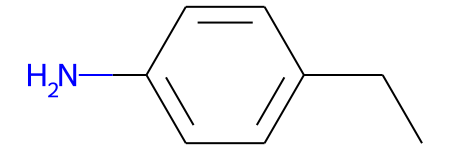

compound2
CC1CNCCC1c1ccc(O)cc1
LogP= 2.1052
Enlaces_rotables 1


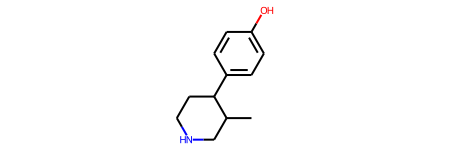

compound3
O=C(O)CCCc1cc(F)c(F)c(F)c1
LogP= 2.5112000000000005
Enlaces_rotables 4


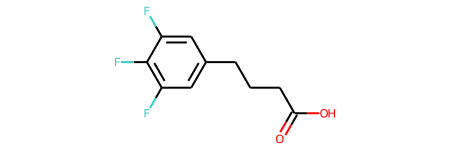

compound4
Oc1ccc2c(c1)CCc1ccccc1-2
LogP= 3.1578000000000017
Enlaces_rotables 0


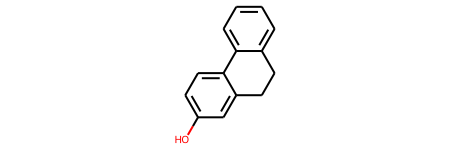

compound5
CC(C)Cc1ccc(C(C)C(=O)O)cc1O
LogP= 2.7788000000000004
Enlaces_rotables 4


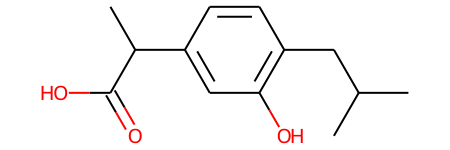

In [24]:
# Partimos de los compuestos a modificar, observar sus propiedades calculadas para comparar con las modificaciones que realicen y ver el impacto que estas tienen en sus propiedades
molecules_3 = 'molecules_3.smi'
reactants_mol = load_Smiles_supplier(molecules_3)
molecules_2(template,reactants_mol)

Para proponer sus modificaciones pueden utilizar el siguiente link: https://chemoinfo.ipmc.cnrs.fr/LEA3D/drawonline.html para dibujar sus moléculas y obtener su smiles.

Pueden modificar la lista de smiles llamada <strong style="background-color:DodgerBlue;">products.smi</strong> colocando los smiles de los compuestos modificados que obtuvieron y ver como impactan esos cambios en sus propiedades.

product1
CCc1ccc(N)cc1
LogP= 1.8312
Enlaces_rotables 1


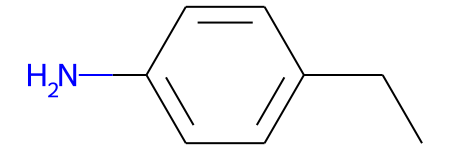

product2
CC1CNCCC1c1ccc(O)cc1
LogP= 2.1052
Enlaces_rotables 1


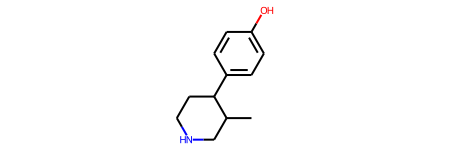

product3
O=C(O)CCCc1cc(F)c(F)c(F)c1
LogP= 2.5112000000000005
Enlaces_rotables 4


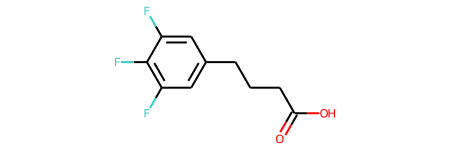

product4
Oc1ccc2c(c1)CCc1ccccc1-2
LogP= 3.1578000000000017
Enlaces_rotables 0


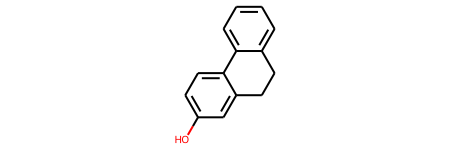

product5
CC(C)Cc1ccc(C(C)C(=O)O)cc1O
LogP= 2.7788000000000004
Enlaces_rotables 4


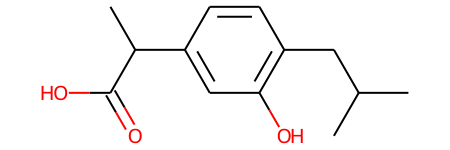

In [219]:
products = 'products.smi'
products_mol = load_Smiles_supplier(products)
molecules_2(template,products_mol)